In [56]:
pip install igraph


     ---------------------------------------- 2.8/2.8 MB 11.9 MB/s eta 0:00:00
  Using cached texttable-1.6.4-py2.py3-none-any.whl (10 kB)


You should consider upgrading via the 'C:\Users\KKo1\Anaconda3\envs\py38\python.exe -m pip install --upgrade pip' command.


In [58]:
pip install louvain


  Using cached louvain-0.7.1-cp39-cp39-win_amd64.whl (94 kB)


You should consider upgrading via the 'C:\Users\KKo1\Anaconda3\envs\py38\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
from numpy import linalg as la
from scipy.sparse import issparse
import loompy
import anndata
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.8.16) on 2023-05-04 16:16.


In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80,dpi_save=300, facecolor='white')

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.5 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.5


In [3]:
import os
os.chdir('F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4')

In [4]:
import scanpy.external as sce

# Epithelial cells

In [6]:
# all are epithelial cell datasets
# file names are incorrect

adata_A = sc.read('Group_A_epithelial_immune.h5ad')
adata_B = sc.read('Group_B_epithelial_immune.h5ad')
adata_C = sc.read('Group_C_epithelial_immune.h5ad')

In [7]:
adata_epi= adata_A.concatenate(adata_B, adata_C)

In [8]:
adata_epi.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,tissue,patient,leiden,batch,total_counts_ribo,...,GOBP_notch_score,GOBP_wnt_score,GOBP_hippo_score,GOBP_cellcycle_score,GOBP_histone_score,GOBP_pi3k_score,celltype,crude,celltype_detail,dataset
AAACCTGAGCTAAACA-1-0-0-0,2747.0,2630,1283.869751,19.201120,1.495566,tumor,P686,8,0,161.193115,...,0.005145,0.064308,-0.003498,0.026385,-0.045633,0.042776,epithelial,epithelial,epithelial,NaN
AAACCTGAGCTGCAAG-1-0-0-0,696.0,664,821.045593,22.309502,2.717206,tumor,P686,18,0,97.282425,...,-0.026850,0.043098,-0.023160,0.019255,-0.034572,-0.058895,epithelial,epithelial,epithelial,NaN
AAACCTGAGTACGTAA-1-0-0-0,366.0,354,642.963806,39.510632,6.145079,tumor,P686,8,0,109.494339,...,-0.048368,0.062410,-0.027361,0.025115,0.036140,0.036661,epithelial,epithelial,epithelial,NaN
AAACCTGCACTGAAGG-1-0-0-0,720.0,699,956.075134,19.870264,2.078316,tumor,P686,26,0,186.630081,...,-0.011385,-0.045636,0.237536,-0.013321,-0.050716,-0.010067,epithelial,epithelial,epithelial,NaN
AAACCTGGTGCACCAC-1-0-0-0,1406.0,1366,388.112122,6.067459,1.563326,tumor,P686,17,0,75.051537,...,-0.015240,-0.011150,-0.014254,-0.010753,-0.027467,-0.025247,epithelial,epithelial,epithelial,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACAAGACGTG-1-60-0-2,NaN,4055,2505.033691,3.604661,0.143897,tumor,P079,35,2,200.048752,...,-0.034226,-0.038333,0.094702,0.164452,0.068549,-0.096092,epithelial,epithelial,epithelial,NaN
TTTGTCACAGGTCTCG-1-60-0-2,NaN,2571,2158.090820,0.000000,0.000000,tumor,P079,35,2,230.678619,...,0.015039,-0.014334,0.023215,0.014408,-0.000805,-0.078653,epithelial,epithelial,epithelial,NaN
TTTGTCAGTAGCGCTC-1-60-0-2,NaN,2401,2428.530029,40.010536,1.647521,tumor,P079,35,2,164.578796,...,0.193945,0.057855,0.083611,0.065215,0.005955,-0.026242,epithelial,epithelial,epithelial,NaN
TTTGTCATCGACCAGC-1-60-0-2,NaN,3596,2603.228271,14.866852,0.571093,tumor,P079,35,2,203.210175,...,0.126555,0.026573,-0.120487,-0.007144,-0.038660,-0.083429,epithelial,epithelial,epithelial,NaN


In [9]:
adata_epi

AnnData object with n_obs × n_vars = 138849 × 11060
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'leiden', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'source', 'patient_cluster', 'Notch_score', 'Tp53_score', 'Cdkn2a_score', 'NFkB_score', 'GOBP_tgfb_score', 'GOBP_notch_score', 'GOBP_wnt_score', 'GOBP_hippo_score', 'GOBP_cellcycle_score', 'GOBP_histone_score', 'GOBP_pi3k_score', 'celltype', 'crude', 'celltype_detail', 'dataset'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'feature_types-0', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'n_cells-10-0', 'n_cells_by_counts-10-0', 'mean_counts-10-0', 'pct_dropout_by_counts-10-0', 'total_counts-10-0', 'n_cells-11-0', 'n_cells_by_counts-11-0', '

In [10]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'T_1': ['P010','P008','P021','P049','P020','P062','P032','P016','P061','P012',
                     'P057','P015','P065','P063','P130','P056', 'P011','P127','P126','P001',
                     'P028','P027','P030'],
             'T_2': ['P037','P031','P026','P042','P019','P017','P036','P054','P023','P128',
                     'P048','P002','P104','P087','P094','P084','P079','P107','P076','P089',
                     'P083'],
                     
                   
             'T_3': [ 'P986','P658','P836','P866','P846','P686','P865','P585','P944','P787'],
             'T_4': ['P052','P024','P040','P039','P080','P075','P091','P009B','P082','P022',
                     'P074','P047','P038','P044','P009A']
              }

# Initialize empty column in cell metadata
adata_epi.obs['T_patient_cluster4'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_epi.obs.patient).isin(cell_dict[i])
    adata_epi.obs.loc[ind,'T_patient_cluster4'] = i


In [11]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'Myeloid_1': ['P063','P056','P009B','P075','P011','P032','P016','P104','P087','P089','P036','P083','P052',
                          'P047','P037','P091','P022','P074','P038','P082'],
            'Myeloid_2':  ['P130','P010','P986','P865','P585','P866','P846','P686','P658','P944','P836','P787'],
             'Myeloid_3': ['P040','P024','P017','P031','P026','P023','P049','P021','P107','P076','P079','P048','P062',
                          'P027','P065','P057','P008','P044','P001','P042','P094','P084','P080','P002','P061','P015'],
             'Myeloid_4': ['P128','P054','P019','P127','P126','P030','P028','P039','P020','P012']
              }

# Initialize empty column in cell metadata
adata_epi.obs['Myeloid_patient_cluster4'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_epi.obs.patient).isin(cell_dict[i])
    adata_epi.obs.loc[ind,'Myeloid_patient_cluster4'] = i


In [7]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'M1toT1': ["P011",	"P016",	"P032",	"P056",	"P063",
],
             'M1toT2': ["P036",	"P037",	"P083",	"P087",	"P089",	"P104",
],
             'M1toT3': [],
             'M1toT4': ["P009B",	"P022",	"P038",	"P047",	"P052",	"P074",	"P075",	"P082",	"P091",
],
             'M2toT1': ["P010",	"P130",
],
             'M2toT2': [],
             'M2toT3': ["P585",	"P658",	"P686",	"P787",	"P836",	"P846",	"P865",	"P866",	"P944",	"P986",
],
             'M2toT4': [],
             'M3toT1': ["P001",	"P008",	"P015",	"P021",	"P027",	"P049",	"P057",	"P061",	"P062",	"P065",
],
             'M3toT2': ["P002",	"P017",	"P023",	"P026",	"P031",	"P042",	"P048",	"P076",	"P079",	"P084",	"P094",	"P107",
],
             'M3toT3': [],
             'M3toT4': ["P024",	"P040",	"P044",	"P080",
],
             'M4toT1': ["P012",	"P020",	"P028",	"P030",	"P126",	"P127",
],
             'M4toT2': ["P019",	"P054",	"P128",
],
             'M4toT3': [],
             'M4toT4': ["P039",
],
             'NoMtoT4': ["P009A",
]
            }

# Initialize empty column in cell metadata
adata_epi.obs['Myeloid_to_T_cluster44'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_epi.obs.patient).isin(cell_dict[i])
    adata_epi.obs.loc[ind,'Myeloid_to_T_cluster44'] = i


In [13]:
adata_epi.obs['crude']

AAACCTGAGCTAAACA-1-0-0-0     epithelial
AAACCTGAGCTGCAAG-1-0-0-0     epithelial
AAACCTGAGTACGTAA-1-0-0-0     epithelial
AAACCTGCACTGAAGG-1-0-0-0     epithelial
AAACCTGGTGCACCAC-1-0-0-0     epithelial
                                ...    
TTTGTCACAAGACGTG-1-60-0-2    epithelial
TTTGTCACAGGTCTCG-1-60-0-2    epithelial
TTTGTCAGTAGCGCTC-1-60-0-2    epithelial
TTTGTCATCGACCAGC-1-60-0-2    epithelial
TTTGTCATCGAGAGCA-1-60-0-2    epithelial
Name: crude, Length: 138849, dtype: category
Categories (1, object): ['epithelial']

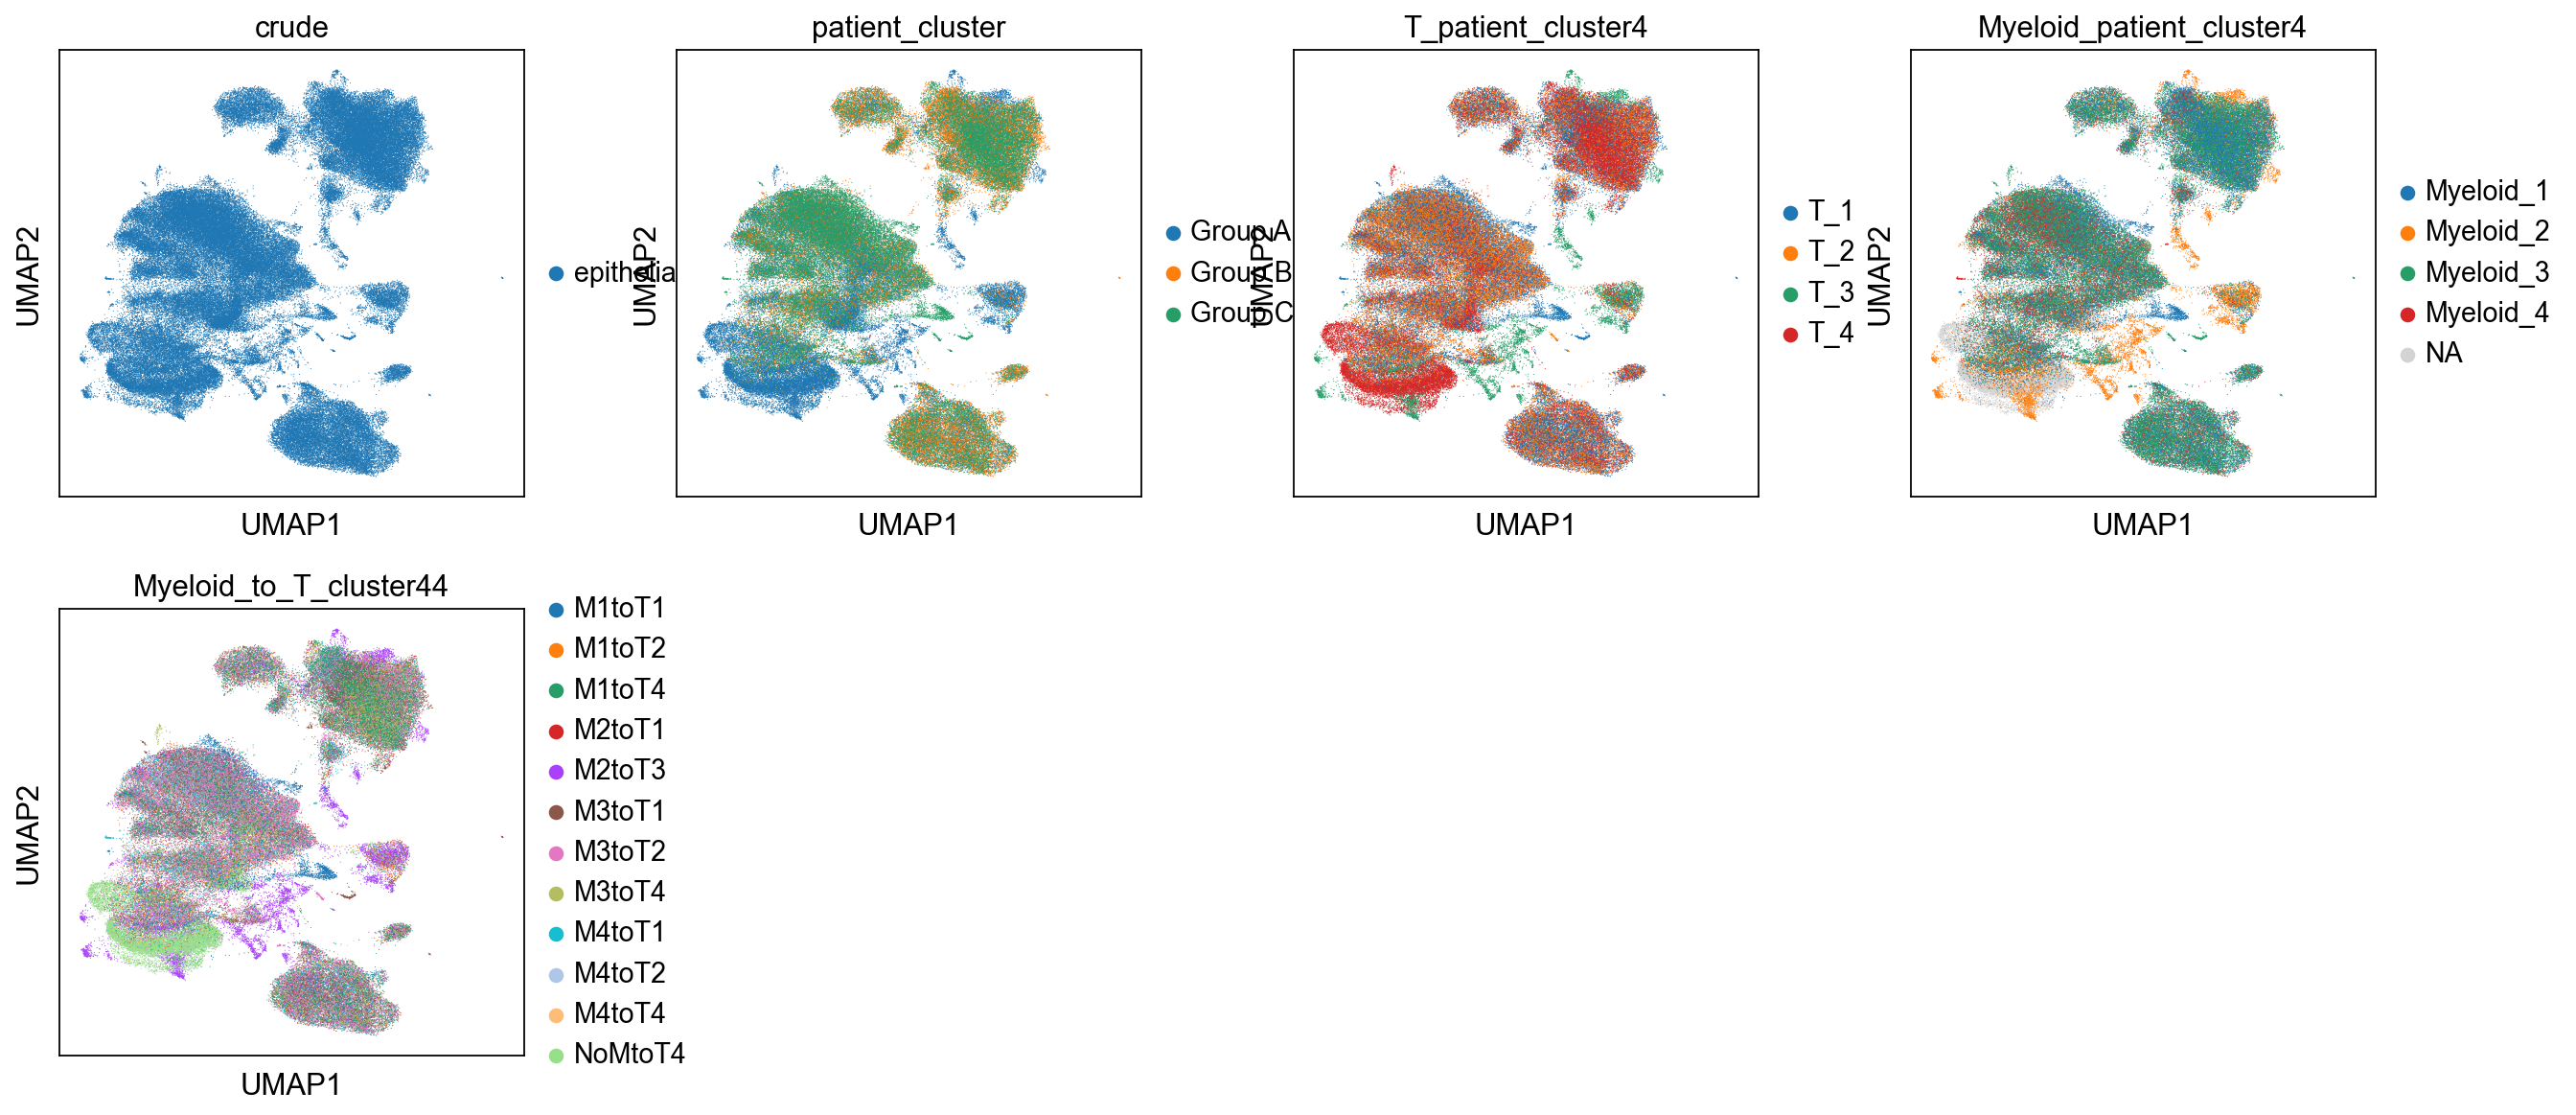

In [14]:
sc.pl.umap(adata_epi, color=['crude','patient_cluster','T_patient_cluster4','Myeloid_patient_cluster4','Myeloid_to_T_cluster44'])

In [15]:
#for fGSEA
sc.tl.rank_genes_groups(adata_epi, groupby='Myeloid_to_T_cluster44', method='wilcoxon', use_raw=True,  key_added = "MtoT_rank_fgsea")
result = adata_epi.uns['MtoT_rank_fgsea']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:5]: result[key][group]
    for group in groups for key in ['names', 'scores','logfoldchanges', 'pvals', 'pvals_adj']}).to_csv("F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4/fgsea/epi_cell_MtoT_cluster_fgesa.csv")
# logFC becomes negative or disappear when use_raw=False, could be Scanpy bug


ranking genes
    finished: added to `.uns['MtoT_rank_fgsea']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:06:41)


In [16]:
adata_epi.write('Epi_cell_04-19-23.h5ad', compression='gzip')

In [5]:
adata_epi = sc.read('Epi_cell_04-19-23.h5ad')

In [9]:
adata_epi_2 = adata_epi[adata_epi.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M3toT4'])]
adata_epi_2.obs['Myeloid_to_T_cluster44']

AAACCTGAGATGCCAG-1-32-0-0    M3toT4
AAACCTGAGCTCCCAG-1-32-0-0    M3toT4
AAACCTGGTATTCGTG-1-32-0-0    M3toT4
AAACCTGGTCACTTCC-1-32-0-0    M3toT4
AAACCTGGTCTAAAGA-1-32-0-0    M3toT4
                              ...  
TTTGTCAAGTCTCGGC-1-49-0-2    M1toT4
TTTGTCACACACATGT-1-49-0-2    M1toT4
TTTGTCACACACTGCG-1-49-0-2    M1toT4
TTTGTCACACTTCTGC-1-49-0-2    M1toT4
TTTGTCATCAAAGACA-1-49-0-2    M1toT4
Name: Myeloid_to_T_cluster44, Length: 27387, dtype: object

In [10]:
#for fGSEA
sc.tl.rank_genes_groups(adata_epi_2, groupby='Myeloid_to_T_cluster44', method='wilcoxon', use_raw=True,  key_added = "MtoT_rank_fgsea")
result = adata_epi_2.uns['MtoT_rank_fgsea']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:5]: result[key][group]
    for group in groups for key in ['names', 'scores','logfoldchanges', 'pvals', 'pvals_adj']}).to_csv("F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4/fgsea/epi_cell_M1T4_M3T4_cluster_fgesa.csv")
# logFC becomes negative or disappear when use_raw=False, could be Scanpy bug


ranking genes
    finished: added to `.uns['MtoT_rank_fgsea']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:36)


# Integrated immune cells

In [17]:
# all immune cells

adata_immn = sc.read('Group_ABC_after_celltype_clustering_Myel_Tcell_group_added.h5ad')

In [18]:
adata_immn.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,tissue,patient,leiden,batch,total_counts_ribo,...,percent_mt2,n_counts,celltype,crude,celltype_detail,patient_cluster,dataset,T_patient_cluster,T_patient_cluster4,Myeloid_patient_cluster4
AAACCTGAGTAGCCGA-1-0-0,3934.0,3879,1452.073242,18.802568,1.294877,tumor,P686,6,0,198.197769,...,0.012949,1452.073242,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2
AAACCTGCAAGAGGCT-1-0-0,674.0,669,882.995728,11.229170,1.271713,tumor,P686,6,0,213.666718,...,0.012717,882.995728,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2
AAACCTGCAGTATCTG-1-0-0,1014.0,1003,956.411804,18.788149,1.964441,tumor,P686,6,0,221.148575,...,0.019644,956.411804,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2
AAACCTGCATGCCTTC-1-0-0,2607.0,2556,1262.646240,23.060396,1.826355,tumor,P686,14,0,161.333832,...,0.018264,1262.646240,14,Myeloid cell,M1 Macrophage,Group A,Dinh dataset,NaN,T_3,Myeloid_2
AAACCTGGTGCCTGGT-1-0-0,896.0,885,1091.559448,17.238060,1.579214,tumor,P686,6,0,176.360626,...,0.015792,1091.559448,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCAAGCCATT-1-24-2,4456.0,4328,1867.209229,29.546848,1.582407,tumor,P001,0,2,172.502136,...,0.015824,1867.209229,0,T cell,CD4 T cell,Group A,Zhang dataset,NaN,T_1,Myeloid_3
TTTGGTTGTCACCCAG-1-24-2,689.0,642,487.017822,17.679008,3.630054,tumor,P001,5,2,59.435638,...,0.036301,487.017822,5,Plasma cell,Plasma cell,Group A,Zhang dataset,NaN,T_1,Myeloid_3
TTTGTCAAGCGCTTAT-1-24-2,248.0,235,523.794067,8.050291,1.536919,tumor,P001,5,2,57.140697,...,0.015369,523.794067,5,Plasma cell,Plasma cell,Group A,Zhang dataset,NaN,T_1,Myeloid_3
TTTGTCAGTCCTCTTG-1-24-2,2711.0,2644,1972.602417,24.433256,1.238631,tumor,P001,10,2,120.637726,...,0.012386,1972.602417,10,T cell,exhausted T cell,Group A,Zhang dataset,NaN,T_1,Myeloid_3


In [19]:
adata_immn.obs['crude']

AAACCTGAGTAGCCGA-1-0-0           T cell
AAACCTGCAAGAGGCT-1-0-0           T cell
AAACCTGCAGTATCTG-1-0-0           T cell
AAACCTGCATGCCTTC-1-0-0     Myeloid cell
AAACCTGGTGCCTGGT-1-0-0           T cell
                               ...     
TTTGGTTCAAGCCATT-1-24-2          T cell
TTTGGTTGTCACCCAG-1-24-2     Plasma cell
TTTGTCAAGCGCTTAT-1-24-2     Plasma cell
TTTGTCAGTCCTCTTG-1-24-2          T cell
TTTGTCAGTCTCTTTA-1-24-2          T cell
Name: crude, Length: 177304, dtype: category
Categories (6, object): ['B cell', 'Mast cell', 'Mixed', 'Myeloid cell', 'Plasma cell', 'T cell']

In [20]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'M1toT1': ["P011",	"P016",	"P032",	"P056",	"P063",
],
             'M1toT2': ["P036",	"P037",	"P083",	"P087",	"P089",	"P104",
],
             'M1toT3': [],
             'M1toT4': ["P009B",	"P022",	"P038",	"P047",	"P052",	"P074",	"P075",	"P082",	"P091",
],
             'M2toT1': ["P010",	"P130",
],
             'M2toT2': [],
             'M2toT3': ["P585",	"P658",	"P686",	"P787",	"P836",	"P846",	"P865",	"P866",	"P944",	"P986",
],
             'M2toT4': [],
             'M3toT1': ["P001",	"P008",	"P015",	"P021",	"P027",	"P049",	"P057",	"P061",	"P062",	"P065",
],
             'M3toT2': ["P002",	"P017",	"P023",	"P026",	"P031",	"P042",	"P048",	"P076",	"P079",	"P084",	"P094",	"P107",
],
             'M3toT3': [],
             'M3toT4': ["P024",	"P040",	"P044",	"P080",
],
             'M4toT1': ["P012",	"P020",	"P028",	"P030",	"P126",	"P127",
],
             'M4toT2': ["P019",	"P054",	"P128",
],
             'M4toT3': [],
             'M4toT4': ["P039",
],
             'NoMtoT4': ["P009A",
]
            }

# Initialize empty column in cell metadata
adata_immn.obs['Myeloid_to_T_cluster44'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_immn.obs.patient).isin(cell_dict[i])
    adata_immn.obs.loc[ind,'Myeloid_to_T_cluster44'] = i


In [21]:
adata_MT = adata_immn[adata_immn.obs['crude'].isin(['Myeloid cell','T cell'])]

In [22]:
adata_MT

View of AnnData object with n_obs × n_vars = 138791 × 12499
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'leiden', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'celltype', 'crude', 'celltype_detail', 'patient_cluster', 'dataset', 'T_patient_cluster', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'Myeloid_to_T_cluster44'
    var: 'gene_ids', 'mt', 'feature_types-10', 'feature_types-11', 'feature_types-12', 'feature_types-13', 'feature_types-14', 'feature_types-15', 'feature_types-16', 'feature_types-17', 'feature_types-18', 'feature_types-19', 'feature_types-20', 'feature_types-21', 'feature_types-3', 'feature_types-4', 'feature_types-5', 'feature_types-6', 'feature_types-7', 'feature_types-8', 'feature_types-9', 'feature_types-0', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-

# T cell dataset

In [23]:
adata_T = sc.read('T_cell_from_Group_ABC_patients_immune_after_harmony.h5ad')

In [24]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'T_1': ['P010','P008','P021','P049','P020','P062','P032','P016','P061','P012',
                     'P057','P015','P065','P063','P130','P056', 'P011','P127','P126','P001',
                     'P028','P027','P030'],
             'T_2': ['P037','P031','P026','P042','P019','P017','P036','P054','P023','P128',
                     'P048','P002','P104','P087','P094','P084','P079','P107','P076','P089',
                     'P083'],
                     
                   
             'T_3': [ 'P986','P658','P836','P866','P846','P686','P865','P585','P944','P787'],
             'T_4': ['P052','P024','P040','P039','P080','P075','P091','P009B','P082','P022',
                     'P074','P047','P038','P044','P009A']
              }

# Initialize empty column in cell metadata
adata_T.obs['T_patient_cluster4'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_T.obs.patient).isin(cell_dict[i])
    adata_T.obs.loc[ind,'T_patient_cluster4'] = i


In [25]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'Myeloid_1': ['P063','P056','P009B','P075','P011','P032','P016','P104','P087','P089','P036','P083','P052',
                          'P047','P037','P091','P022','P074','P038','P082'],
            'Myeloid_2':  ['P130','P010','P986','P865','P585','P866','P846','P686','P658','P944','P836','P787'],
             'Myeloid_3': ['P040','P024','P017','P031','P026','P023','P049','P021','P107','P076','P079','P048','P062',
                          'P027','P065','P057','P008','P044','P001','P042','P094','P084','P080','P002','P061','P015'],
             'Myeloid_4': ['P128','P054','P019','P127','P126','P030','P028','P039','P020','P012']
              }

# Initialize empty column in cell metadata
adata_T.obs['Myeloid_patient_cluster4'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_T.obs.patient).isin(cell_dict[i])
    adata_T.obs.loc[ind,'Myeloid_patient_cluster4'] = i


In [26]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'M1toT1': ["P011",	"P016",	"P032",	"P056",	"P063",
],
             'M1toT2': ["P036",	"P037",	"P083",	"P087",	"P089",	"P104",
],
             'M1toT3': [],
             'M1toT4': ["P009B",	"P022",	"P038",	"P047",	"P052",	"P074",	"P075",	"P082",	"P091",
],
             'M2toT1': ["P010",	"P130",
],
             'M2toT2': [],
             'M2toT3': ["P585",	"P658",	"P686",	"P787",	"P836",	"P846",	"P865",	"P866",	"P944",	"P986",
],
             'M2toT4': [],
             'M3toT1': ["P001",	"P008",	"P015",	"P021",	"P027",	"P049",	"P057",	"P061",	"P062",	"P065",
],
             'M3toT2': ["P002",	"P017",	"P023",	"P026",	"P031",	"P042",	"P048",	"P076",	"P079",	"P084",	"P094",	"P107",
],
             'M3toT3': [],
             'M3toT4': ["P024",	"P040",	"P044",	"P080",
],
             'M4toT1': ["P012",	"P020",	"P028",	"P030",	"P126",	"P127",
],
             'M4toT2': ["P019",	"P054",	"P128",
],
             'M4toT3': [],
             'M4toT4': ["P039",
],
             'NoMtoT4': ["P009A",
]
            }

# Initialize empty column in cell metadata
adata_T.obs['Myeloid_to_T_cluster44'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_T.obs.patient).isin(cell_dict[i])
    adata_T.obs.loc[ind,'Myeloid_to_T_cluster44'] = i


In [27]:
#for fGSEA
sc.tl.rank_genes_groups(adata_T, groupby='Myeloid_to_T_cluster44', method='wilcoxon', use_raw=True,  key_added = "MtoT_rank_fgsea")
result = adata_T.uns['MtoT_rank_fgsea']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:5]: result[key][group]
    for group in groups for key in ['names', 'scores','logfoldchanges', 'pvals', 'pvals_adj']}).to_csv("F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4/fgsea/T_cell_MtoT_cluster_fgesa.csv")
# logFC becomes negative or disappear when use_raw=False, could be Scanpy bug


ranking genes
    finished: added to `.uns['MtoT_rank_fgsea']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:05:55)


In [28]:
adata_T.write('T_cell_04-19-23.h5ad', compression='gzip')

In [11]:
adata_T = sc.read('T_cell_04-19-23.h5ad')

In [12]:
adata_T_2 = adata_T[adata_T.obs['Myeloid_to_T_cluster44'].isin(['M1toT4','M3toT4'])]
adata_T_2.obs['Myeloid_to_T_cluster44']

AAACCTGAGCCCAGCT-1-12-0    M1toT4
AAACCTGCAAGCCCAC-1-12-0    M1toT4
AAACCTGCAATCAGAA-1-12-0    M1toT4
AAACCTGCACGGTAAG-1-12-0    M1toT4
AAACCTGCAGCTGCAC-1-12-0    M1toT4
                            ...  
TTTGTCACAAGGACAC-1-18-2    M3toT4
TTTGTCAGTCACCCAG-1-18-2    M3toT4
TTTGTCAGTCTGCCAG-1-18-2    M3toT4
TTTGTCAGTGTTTGTG-1-18-2    M3toT4
TTTGTCAGTTGGAGGT-1-18-2    M3toT4
Name: Myeloid_to_T_cluster44, Length: 29904, dtype: category
Categories (2, object): ['M1toT4', 'M3toT4']

In [13]:
#for fGSEA
sc.tl.rank_genes_groups(adata_T_2, groupby='Myeloid_to_T_cluster44', method='wilcoxon', use_raw=True,  key_added = "MtoT_rank_fgsea")
result = adata_T_2.uns['MtoT_rank_fgsea']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:5]: result[key][group]
    for group in groups for key in ['names', 'scores','logfoldchanges', 'pvals', 'pvals_adj']}).to_csv("F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4/fgsea/T_cell_M1T4_M3T4_cluster_fgesa.csv")
# logFC becomes negative or disappear when use_raw=False, could be Scanpy bug


ranking genes
    finished: added to `.uns['MtoT_rank_fgsea']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:44)


# Myeloid cell dataset

In [29]:
adata_M = sc.read('Myeloid_cell_from_Group_ABC_patients_immune_after_harmony.h5ad')

In [30]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'T_1': ['P010','P008','P021','P049','P020','P062','P032','P016','P061','P012',
                     'P057','P015','P065','P063','P130','P056', 'P011','P127','P126','P001',
                     'P028','P027','P030'],
             'T_2': ['P037','P031','P026','P042','P019','P017','P036','P054','P023','P128',
                     'P048','P002','P104','P087','P094','P084','P079','P107','P076','P089',
                     'P083'],
                     
                   
             'T_3': [ 'P986','P658','P836','P866','P846','P686','P865','P585','P944','P787'],
             'T_4': ['P052','P024','P040','P039','P080','P075','P091','P009B','P082','P022',
                     'P074','P047','P038','P044','P009A']
              }

# Initialize empty column in cell metadata
adata_M.obs['T_patient_cluster4'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_M.obs.patient).isin(cell_dict[i])
    adata_M.obs.loc[ind,'T_patient_cluster4'] = i


In [31]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'Myeloid_1': ['P063','P056','P009B','P075','P011','P032','P016','P104','P087','P089','P036','P083','P052',
                          'P047','P037','P091','P022','P074','P038','P082'],
            'Myeloid_2':  ['P130','P010','P986','P865','P585','P866','P846','P686','P658','P944','P836','P787'],
             'Myeloid_3': ['P040','P024','P017','P031','P026','P023','P049','P021','P107','P076','P079','P048','P062',
                          'P027','P065','P057','P008','P044','P001','P042','P094','P084','P080','P002','P061','P015'],
             'Myeloid_4': ['P128','P054','P019','P127','P126','P030','P028','P039','P020','P012']
              }

# Initialize empty column in cell metadata
adata_M.obs['Myeloid_patient_cluster4'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_M.obs.patient).isin(cell_dict[i])
    adata_M.obs.loc[ind,'Myeloid_patient_cluster4'] = i


In [32]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'M1toT1': ["P011",	"P016",	"P032",	"P056",	"P063",
],
             'M1toT2': ["P036",	"P037",	"P083",	"P087",	"P089",	"P104",
],
             'M1toT3': [],
             'M1toT4': ["P009B",	"P022",	"P038",	"P047",	"P052",	"P074",	"P075",	"P082",	"P091",
],
             'M2toT1': ["P010",	"P130",
],
             'M2toT2': [],
             'M2toT3': ["P585",	"P658",	"P686",	"P787",	"P836",	"P846",	"P865",	"P866",	"P944",	"P986",
],
             'M2toT4': [],
             'M3toT1': ["P001",	"P008",	"P015",	"P021",	"P027",	"P049",	"P057",	"P061",	"P062",	"P065",
],
             'M3toT2': ["P002",	"P017",	"P023",	"P026",	"P031",	"P042",	"P048",	"P076",	"P079",	"P084",	"P094",	"P107",
],
             'M3toT3': [],
             'M3toT4': ["P024",	"P040",	"P044",	"P080",
],
             'M4toT1': ["P012",	"P020",	"P028",	"P030",	"P126",	"P127",
],
             'M4toT2': ["P019",	"P054",	"P128",
],
             'M4toT3': [],
             'M4toT4': ["P039",
],
             'NoMtoT4': ["P009A",
]
            }

# Initialize empty column in cell metadata
adata_M.obs['Myeloid_to_T_cluster44'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_M.obs.patient).isin(cell_dict[i])
    adata_M.obs.loc[ind,'Myeloid_to_T_cluster44'] = i


In [33]:
#for fGSEA
sc.tl.rank_genes_groups(adata_M, groupby='Myeloid_to_T_cluster44', method='wilcoxon', use_raw=True,  key_added = "MtoT_rank_fgsea")
result = adata_M.uns['MtoT_rank_fgsea']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:5]: result[key][group]
    for group in groups for key in ['names', 'scores','logfoldchanges', 'pvals', 'pvals_adj']}).to_csv("F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4/fgsea/Myeloid_cell_MtoT_cluster_fgesa.csv")
# logFC becomes negative or disappear when use_raw=False, could be Scanpy bug


ranking genes
    finished: added to `.uns['MtoT_rank_fgsea']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:06)


In [34]:
adata_M.write('Myeloid_cell_04-19-23.h5ad', compression='gzip')